In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='Latin-1')

In [3]:
df.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# drop last 3 columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Converting the spring of class ham as 0 and spam as 1
df['class']=df['class'].map({'ham':0,'spam':1})

In [8]:
df.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

class      0
message    0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df['class'].value_counts()

0    4516
1     653
Name: class, dtype: int64

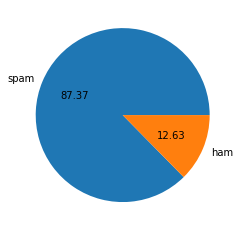

In [14]:
# Given Pie-Chart show the spam and ham message in the respective spam.csv file
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv=CountVectorizer()

In [17]:
x=df['message']
y=df['class']

In [18]:
x.shape

(5169,)

In [19]:
y.shape

(5169,)

In [20]:
x=cv.fit_transform(x)

In [21]:
x

<5169x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 68018 stored elements in Compressed Sparse Row format>

1.The Cat
2.The Dog
3.The Bird
   
    The Cat Dog Bird
1.  1   1   0   0
2.  1   0   1   0
3.  1   0   0   1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape

(4135, 8672)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
model=MultinomialNB()

In [27]:
model.fit(x_train,y_train)

MultinomialNB()

In [28]:
result=model.score(x_test,y_test)

In [29]:
result

0.97678916827853

In [30]:
import pickle

In [31]:
pickle.dump(model,open("spam.pkl","wb"))

In [32]:
pickle.dump(cv,open("vectorizer.pkl","wb"))

In [33]:
clf=pickle.load(open("spam.pkl","rb"))

In [34]:
clf

MultinomialNB()

In [35]:
msg="You win 10 Dollar"
df=[msg]
vect=cv.transform(df).toarray()
result=model.predict(vect)
print(result)

[1]
